In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_13_11_P0-5_I0-0_D0_ramp0.csv")

# แปลง timestamp ให้อ่านง่าย (เป็นวินาทีเริ่มต้น)
start_time = df['time'].iloc[0]
df['time_sec'] = df['time'] - start_time

# Plot 1: กราฟ XY แสดงเส้นทางหุ่น (ตำแหน่ง x,y)
plt.figure(figsize=(8,8))
plt.plot(df['x'], df['y'], marker='o')
plt.title('Robot path (X vs Y)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')  # ทำให้สเกล x,y เท่ากันเพื่อดูรูปทรง
plt.show()

OSError: [Errno 22] Invalid argument: 'D:\\downsyndrome\\year2_1\\Robot_Module_2-1\\J.Thanet\\Draw_square\\data\robot_log_18_13_11_P0-5_I0-0_D0_ramp0.csv'

Found 52 CSV files.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


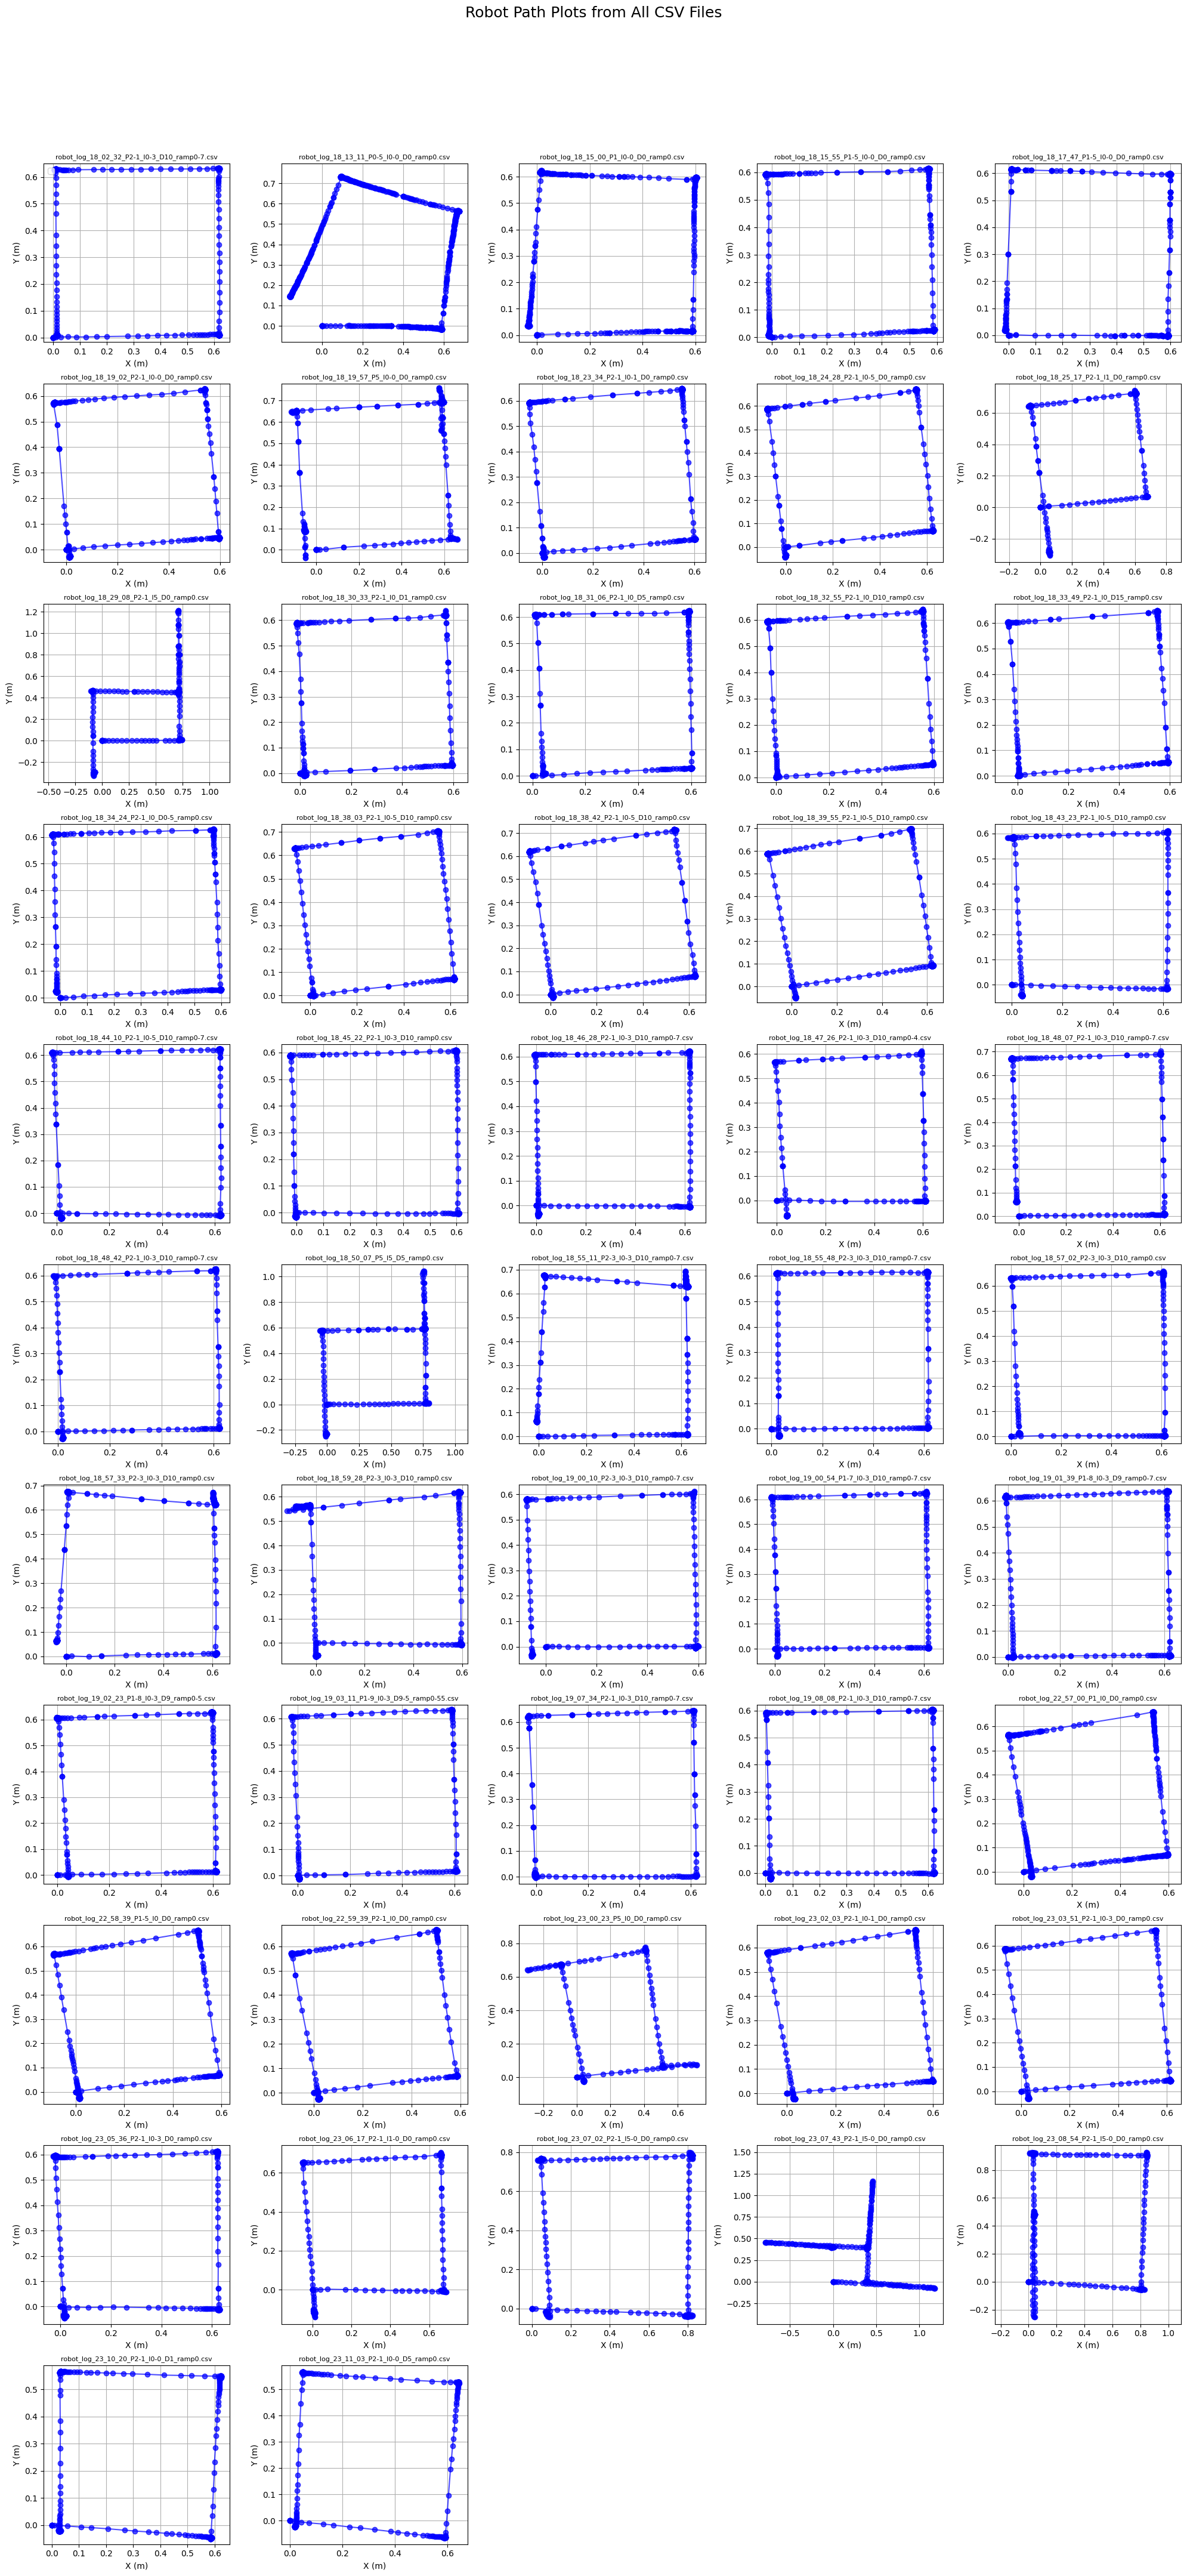

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = '.'  # ปรับเป็น path ที่ต้องการ เช่น './logs' ถ้าอยู่ในโฟลเดอร์ย่อย

# หาทุกไฟล์ .csv ในโฟลเดอร์นั้น
filenames = sorted(glob.glob(os.path.join("D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data", "robot_log_*.csv")))

# ตรวจสอบจำนวนไฟล์ที่พบ
n_files = len(filenames)
print(f"Found {n_files} CSV files.")

# กำหนด layout subplot
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols

# สร้าง subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()  # เปลี่ยนให้ใช้ index เดียวกันง่าย

# พล็อตแต่ละไฟล์
for i, filename in enumerate(filenames):
    try:
        df = pd.read_csv(filename)
        x = df['x'].values
        y = df['y'].values

        ax = axes[i]
        ax.plot(x, y, marker='o', linestyle='-', color='blue', alpha=0.7)
        ax.set_title(os.path.basename(filename), fontsize=8)
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True)
        ax.axis('equal')

        if i == 0:
            ax.legend()

    except Exception as e:
        print(f"Error in file {filename}: {e}")
        continue

# ลบช่อง subplot ที่ไม่ได้ใช้
for j in range(len(filenames), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Robot Path Plots from All CSV Files", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


Plotting 2 CSV files.
Successfully plotted: robot_log_18_15_00_P1_I0-0_D0_ramp0.csv
Successfully plotted: robot_log_18_17_47_P1-5_I0-0_D0_ramp0.csv


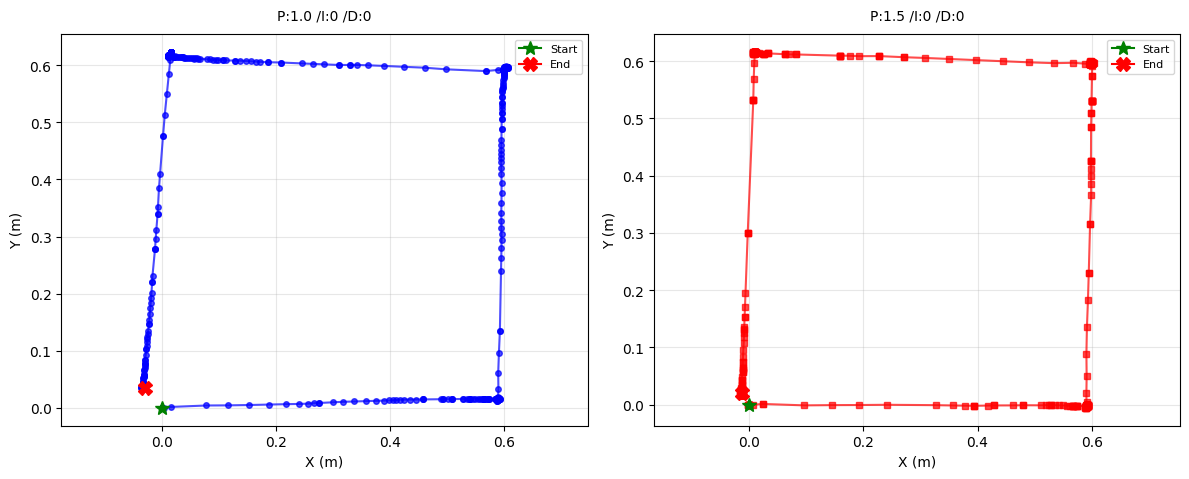

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ระบุไฟล์ที่ต้องการพล็อต
filenames = [
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_15_00_P1_I0-0_D0_ramp0.csv",  # ใส่ path ไฟล์ที่ 1 ตรงนี้
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_17_47_P1-5_I0-0_D0_ramp0.csv"   # ใส่ path ไฟล์ที่ 2 ตรงนี้
]

# ตรวจสอบจำนวนไฟล์
n_files = len(filenames)
print(f"Plotting {n_files} CSV files.")

# สร้าง subplot (1 แถว, 2 คอลัมน์)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# สีและ marker สำหรับแต่ละไฟล์
colors = ['blue', 'red']
markers = ['o', 's']

# พล็อตแต่ละไฟล์
for i, filename in enumerate(filenames):
    try:
        # ตรวจสอบว่าไฟล์มีอยู่จริง
        if not os.path.exists(filename):
            print(f"File not found: {filename}")
            continue
            
        df = pd.read_csv(filename)
        
        # ตรวจสอบว่ามีคอลัมน์ x และ y
        if 'x' not in df.columns or 'y' not in df.columns:
            print(f"Missing x or y columns in file: {filename}")
            continue
            
        x = df['x'].values
        y = df['y'].values
        
        # พล็อตในแต่ละ subplot
        ax = axes[i]
        ax.plot(x, y, marker=markers[i], linestyle='-', color=colors[i], 
                alpha=0.7, markersize=4, linewidth=1.5)
        
        # ตั้งชื่อกราฟ (แก้ไขชื่อได้ตรงนี้)
        plot_titles = ["P:1.0 /I:0 /D:0", "P:1.5 /I:0 /D:0"]  # ใส่ชื่อกราฟที่ต้องการสำหรับไฟล์ที่ 1 และ 2
        title = plot_titles[i] if plot_titles[i] else os.path.basename(filename)
        ax.set_title(title, fontsize=10, pad=10)
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True, alpha=0.3)
        ax.axis('equal')
        
        # เพิ่ม start และ end point
        ax.plot(x[0], y[0], marker='*', color='green', markersize=10, label='Start')
        ax.plot(x[-1], y[-1], marker='X', color='red', markersize=10, label='End')
        ax.legend(fontsize=8)
        
        print(f"Successfully plotted: {os.path.basename(filename)}")
        
    except Exception as e:
        print(f"Error in file {filename}: {e}")
        continue

plt.suptitle("", fontsize=16)  # ใส่ชื่อหลักของกราฟตรงนี้
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()




Plotting 2 CSV files.
Successfully plotted: robot_log_18_19_02_P2-1_I0-0_D0_ramp0.csv
Successfully plotted: robot_log_18_19_57_P5_I0-0_D0_ramp0.csv


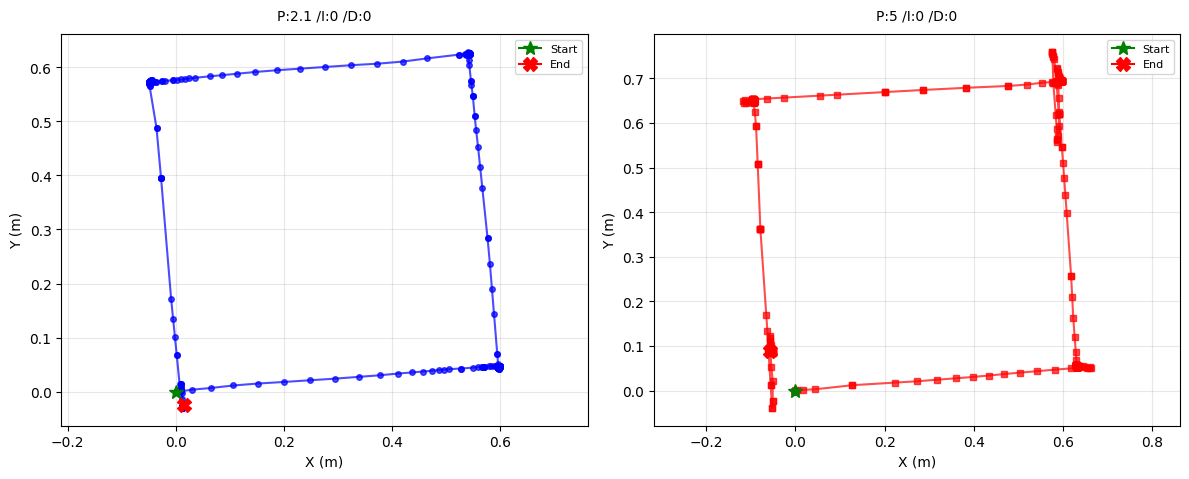

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ระบุไฟล์ที่ต้องการพล็อต
filenames = [
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_19_02_P2-1_I0-0_D0_ramp0.csv",  # ใส่ path ไฟล์ที่ 1 ตรงนี้
    r"D:\downsyndrome\year2_1\Robot_Module_2-1\J.Thanet\Draw_square\data\robot_log_18_19_57_P5_I0-0_D0_ramp0.csv"   # ใส่ path ไฟล์ที่ 2 ตรงนี้
]

# ตรวจสอบจำนวนไฟล์
n_files = len(filenames)
print(f"Plotting {n_files} CSV files.")

# สร้าง subplot (1 แถว, 2 คอลัมน์)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# สีและ marker สำหรับแต่ละไฟล์
colors = ['blue', 'red']
markers = ['o', 's']

# พล็อตแต่ละไฟล์
for i, filename in enumerate(filenames):
    try:
        # ตรวจสอบว่าไฟล์มีอยู่จริง
        if not os.path.exists(filename):
            print(f"File not found: {filename}")
            continue
            
        df = pd.read_csv(filename)
        
        # ตรวจสอบว่ามีคอลัมน์ x และ y
        if 'x' not in df.columns or 'y' not in df.columns:
            print(f"Missing x or y columns in file: {filename}")
            continue
            
        x = df['x'].values
        y = df['y'].values
        
        # พล็อตในแต่ละ subplot
        ax = axes[i]
        ax.plot(x, y, marker=markers[i], linestyle='-', color=colors[i], 
                alpha=0.7, markersize=4, linewidth=1.5)
        
        # ตั้งชื่อกราฟ (แก้ไขชื่อได้ตรงนี้)
        plot_titles = ["P:2.1 /I:0 /D:0", "P:5 /I:0 /D:0"]  # ใส่ชื่อกราฟที่ต้องการสำหรับไฟล์ที่ 1 และ 2
        title = plot_titles[i] if plot_titles[i] else os.path.basename(filename)
        ax.set_title(title, fontsize=10, pad=10)
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True, alpha=0.3)
        ax.axis('equal')
        
        # เพิ่ม start และ end point
        ax.plot(x[0], y[0], marker='*', color='green', markersize=10, label='Start')
        ax.plot(x[-1], y[-1], marker='X', color='red', markersize=10, label='End')
        ax.legend(fontsize=8)
        
        print(f"Successfully plotted: {os.path.basename(filename)}")
        
    except Exception as e:
        print(f"Error in file {filename}: {e}")
        continue

plt.suptitle("", fontsize=16)  # ใส่ชื่อหลักของกราฟตรงนี้
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

